In [1]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

C:\Users\lutin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lutin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lutin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lutin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

1.13.2
2.2.4


Using TensorFlow backend.


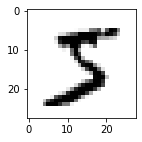

5


In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(train_feature,train_label),(test_feature,test_label) = mnist.load_data()
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2) #數字圖片大小
    plt.imshow(image, cmap="binary")  #黑白灰階顯示
    plt.show()
    
show_image(train_feature[0]) #顯示訓練資料第1個圖片
print(train_label[0]) #train_label是訓練資料數字的真實性，得到數字5
    

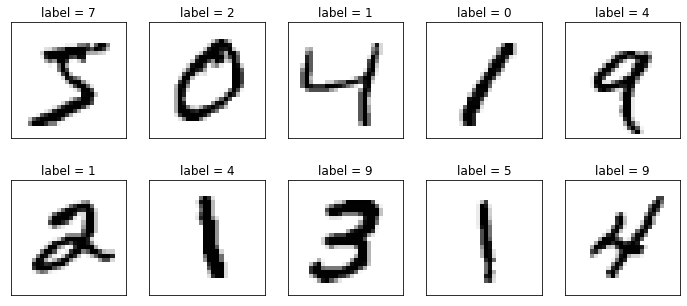

In [9]:
#查看多筆訓練資料
def show_image_labels_predictions(images,labels,predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
        #顯示黑白圖片
        ax.imshow(images[start_id],cmap='binary')
        
        #有AI預測結果資料，才在標題顯示預測結果
        if(len(predictions)>0):
            title = 'ai = ' + str(predictions[start_id])
            #預測正確顯示 o，錯誤顯示 x
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)')
            title += '\nlabel = ' + str(labels[start_id])
        #沒有AI預測結果資料，只在標題顯示真實數字
        else:
            title = 'label = ' + str(labels[start_id])
       #X,Y軸不顯示刻度
        ax.set_title(title,fontsize=12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()
show_image_labels_predictions(train_feature,test_label,[],0,10)

In [16]:
#image轉換
#用reshape()函式將28*28的數字圖片轉換為784個數字的一維向量，再以astype將每個數字都轉換為float數字
train_feature_vector = train_feature.reshape(len(train_feature),784).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784).astype('float32')

print(train_feature_vector.shape,test_feature_vector.shape)
print(train_feature_vector[0])

(60000, 784) (10000, 784)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64. 

In [18]:
#image標準化
#將0-255的數字，除以255得到0~1之間的浮點數，稱為標準化
#標準化可以提高模型預測的精準度，增加訓練效率
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print(train_feature_normalize)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
#顯示label真實性
print(train_label[0:5])#訓練資料label前5筆

[5 0 4 1 9]


In [22]:
from keras.utils import np_utils
train_label_onhot = np_utils.to_categorical(train_label)
test_label_onhot = np_utils.to_categorical(test_label)

print(train_label_onhot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
